<a href="https://colab.research.google.com/github/datascience-uniandes/data-analysis-tutorial/blob/master/airbnb/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

MINE-4101: Applied Data Science  
Univerisdad de los Andes
Lizeth Viviana Perdomo Castañeda  
  
**Dataset:** AirBnb Listings - Santiago, Región Metropolitana de Santiago, Chile [[dataset](http://insideairbnb.com/get-the-data/) | [dictionary](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?usp=sharing)]. This dataset comprises information about Airbnb property listings in Santiago de Chile. It includes data points like neighborhood, property type, price per night, number of reviews, review scores, availability, amenities, and more.

**Business Context:** Property Investment and Vacation Rental Strategy. You're a consultant for individuals and firms looking to invest in properties for Airbnb rentals. They want to identify the most lucrative neighborhoods, optimal pricing strategies, and understand the factors that contribute to positive reviews and frequent bookings.

Last update: August, 2024

In [1]:
import pip

In [2]:
pip.main(["install","seaborn"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Requirement already satisfied: seaborn in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (0.13.2)

Requirement already satisfied: numpy!=1.24.0,>=1.20 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from seaborn) (2.1.0)

Requirement already satisfied: pandas>=1.2 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from seaborn) (2.2.2)

Requirement already satisfied: matplotlib!=3.6.1,>=3.4 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from seaborn) (3.9.2)

Requirement already satisfied: contourpy>=1.0.1 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.2.1)

Requirement already satisfied: cycler>=0.10 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (4.53.1)

Requirement already satisfied: kiwisolver>=1.3.1 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (1.4.5)

Requirement already satisfied: packaging>=20.0 in c:\users\lperd\appdata\roaming\python\python312\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (24.1)

Requirement already satisfied: pillow>=8 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (10.4.0)

Requirement already satisfied: pyparsing>=2.3.1 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (3.1.2)

Requirement already satisfied: python-dateutil>=2.7 in c:\users\lperd\appdata\roaming\python\python312\site-packages (from matplotlib!=3.6.1,>=3.4->seaborn) (2.9.0.post0)

Requirement already satisfied: pytz>=2020.1 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from pandas>=1.2->seaborn) (2024.1)

Requirement already satisfied: tzdata>=2022.7 in c:\users\lperd\appdata\local\programs\python\python312\lib\site-packages (from pandas>=1.2->seaborn) (2024.1)

Requirement already satisfied: six>=1.5 in c:\users\lperd\appdata\roaming\python\python312\site-packages (from python-dateutil>=2.7->matplotlib!=3.6.1,>=3.4->seaborn) (1.16.0)

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip

0

In [3]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [4]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

### 1. Load the data

In [5]:
# Loading the CSV file as dataframe
listings_Santiago_df = pd.read_csv("./listings.csv.gz")

In [6]:
# Showing dataframe dimensions
listings_Santiago_df.shape

(13053, 75)

In [7]:
# Showing column types
listings_Santiago_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [8]:
listings_Santiago_df.sample(5) # Showing a sample of n rows

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
7220,802924084202450186,https://www.airbnb.com/rooms/802924084202450186,20240629050059,2024-06-29,city scrape,Taller Habitacion para crear.,"Wake up, relax, work, disconnect in a private...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,151682116,https://www.airbnb.com/users/show/151682116,G.Paola,2017-09-22,NaN,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/23351...,https://a0.muscache.com/im/pictures/user/23351...,NaN,1,1,"['email', 'phone']",t,t,NaN,Las Condes,NaN,-33.413310,-70.551470,Private room in casa particular,Private room,1,1.0,1 private bath,1.0,1.0,"[""Pool"", ""Smoke alarm"", ""Lock on bedroom door""...","$68,360.00",1,3,1,1,3,3,1.0,3.0,NaN,t,30,60,90,90,2024-06-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
9260,976117544929955075,https://www.airbnb.com/rooms/976117544929955075,20240629050059,2024-06-29,city scrape,Cómodo departamento céntrico P. 18-8,"Enjoy the simplicity of this quiet, central home.",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,534412346,https://www.airbnb.com/users/show/534412346,Aida,2023-08-28,"Santiago, Chile",NaN,within an hour,100%,92%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,5,6,['phone'],t,t,NaN,Santiago,NaN,-33.442037,-70.660227,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,[],"$37,000.00",2,365,1,2,365,365,1.4,365.0,NaN,t,29,59,89,269,2024-06-29,1,1,0,2023-11-12,2023-11-12,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,t,5,5,0,0,0.13
8957,953496670525180317,https://www.airbnb.com/rooms/953496670525180317,20240629050059,2024-06-29,city scrape,Acogedor y céntrico estudio 2,"Enjoy the simplicity of this quiet, central ho...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,117754440,https://www.airbnb.com/users/show/117754440,Karla,2017-02-23,"Santiago, Chile","Soy ingeniera, a veces karateca, amo a los ani...",within an hour,100%,99%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,6,8,"['email', 'phone']",t,t,NaN,Santiago,NaN,-33.456440,-70.630890,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Laundromat nea...","$26,286.00",2,365,2,2,365,365,2.0,365.0,NaN,t,21,44,69,249,2024-06-29,25,25,4,2023-08-16,2024-06-25,4.76,4.96,4.64,4.88,4.84,4.52,4.68,NaN,f,6,6,0,0,2.35
7941,868725748534340603,https://www.airbnb.com/rooms/868725748534340603,20240629050059,2024-06-29,city scrape,"tranquilo, seguro, cercano Metro",Relax with the whole family at this place to s...,A building steps from the Escuela Camino Agríc...,https://a0.muscache.com/pictures/miso/Hosting-...,440361141,https:/

### 2. Univariate analysis

The five most relevant attributes for real estate investment analysis are: 

1. Price
2. Location
3. Property type
4. User Rating
5. Amenities

In [9]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
listings_Santiago_df["id"].nunique()

13053

#### 2.1 Price

In [10]:
# We need to transform the price attribute from object to float
listings_Santiago_df["price_float"] = listings_Santiago_df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [11]:
print(listings_Santiago_df["price_float"].dtype)

float64


In [12]:
listings_Santiago_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_float
0,49392,https://www.airbnb.com/rooms/49392,20240629050059,2024-06-29,city scrape,Share my Flat in Providencia,NaN,NaN,https://a0.muscache.com/pictures/3740612/b1850...,224592,https://www.airbnb.com/users/show/224592,Maria,2010-09-05,"Providencia, Chile","Disfruto viajando, sobre todo a lugares donde ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/bd1a8...,https://a0.muscache.com/im/pictures/user/bd1a8...,NaN,2,3,"['email', 'phone']",t,t,NaN,Providencia,NaN,-33.43277,-70.59892,Private room in rental unit,Private room,1,NaN,NaN,1.0,1.0,[],"$50,183.00",3,730,3,3,730,730,3.0,730.0,NaN,t,28,58,88,178,2024-06-29,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN,50183.0
1,52811,https://www.airbnb.com/rooms/52811,20240629050059,2024-06-29,city scrape,Suite Providencia 1 Santiago Chile,Apartment located on the subway station Manuel...,Building located at the entrance to the Manuel...,https://a0.muscache.com/pictures/miso/Hosting-...,244792,https://www.airbnb.com/users/show/244792,Cristián,2010-09-25,"Santiago Metropolitan Region, Chile","Un tipo profesional, trabajador, sencillo, con...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/244792/profil...,https://a0.muscache.com/im/users/244792/profil...,NaN,3,4,"['email', 'phone', 'work_email']",t,t,"Providencia, Región Metropolitana, Chile",Providencia,NaN,-33.42959,-70.61880,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,1.0,"[""Pool"", ""BBQ grill"", ""Air conditioning"", ""Wif...","$51,130.00",1,1825,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,271,2024-06-29,45,0,0,2010-11-13,2021-11-04,4.42,4.59,4.52,4.66,4.59,4.64,4.36,NaN,t,3,3,0,0,0.27,51130.0
2,53494,https://www.airbnb.com/rooms/53494,20240629050059,2024-06-29,city scrape,depto centro ski el colorado chile,NaN,NaN,https://a0.muscache.com/pictures/310936/ff7d53...,249097,https://www.airbnb.com/users/show/249097,Paulina,2010-09-29,NaN,"Soy dentista, casada,4 hijos",within an hour,100%,74%,f,https://a0.muscache.com/im/pictures/user/6d0ff...,https://a0.muscache.com/im/pictures/user/6d0ff...,NaN,2,2,"['email', 'phone']",t,t,NaN,Lo Barnechea,NaN,-33.34521,-70.29543,Entire rental unit,Entire home/apt,6,2.0,2 baths,2.0,8.0,"[""Free parking on premises"", ""Essentials"", ""Se...","$235,714.00",2,730,1,2,730,730,2.0,730.0,NaN,t,4,17,44,319,2024-06-29,41,4,4,2016-07-04,2024-06-20,4.76,4.80,4.90,4.88,4.90,4.76,4.68,NaN,f,1,1,0,0,0.42,235714.0
3,65058,https://www.airbnb.com/rooms/65058,20240629050059,2024-06-29,previous scrape,Dpto amoblado centro historico,NaN,NaN,https://a0.muscache.com/pictures/1023289/2ec04...,318016,https://www.airbnb.com/users/show/318016,Patricio,2010-12-13,"Santiago, Chile",Me gusta el de

In [14]:
mean_price = listings_Santiago_df['price_float'].mean(skipna=True)
print(mean_price)

87723.22100597068


In [15]:
std_dev_price = listings_Santiago_df['price_float'].std(skipna=True)
print(std_dev_price)

810490.798883986


[]

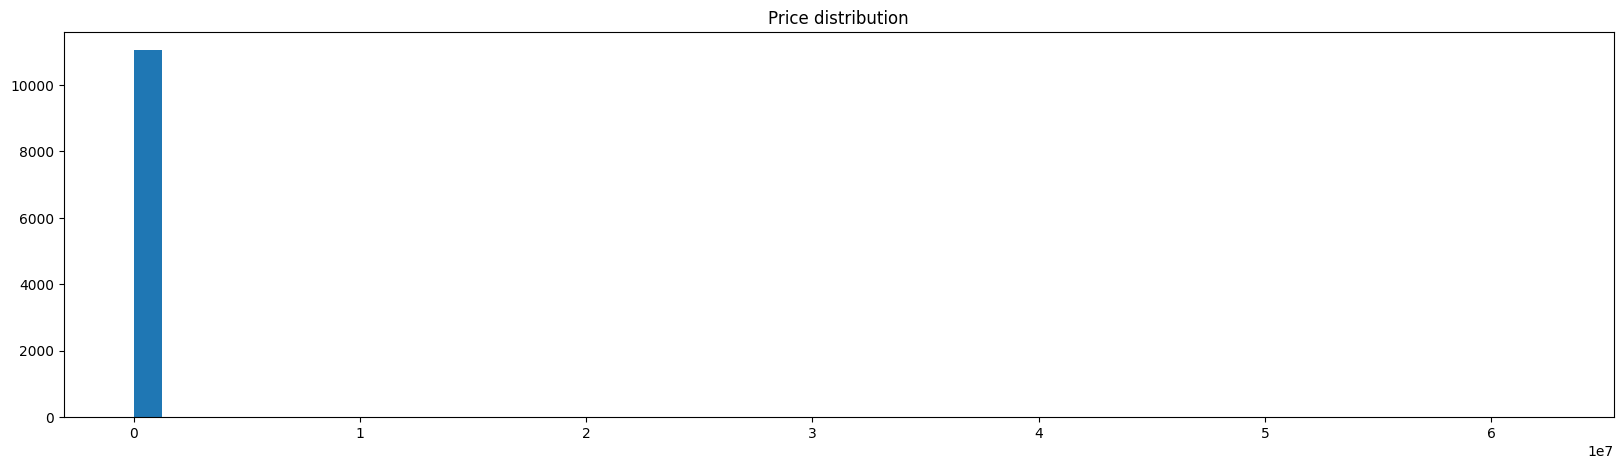

In [16]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(listings_Santiago_df["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

<span style="color: red;">This attribute has an extreme outlier making difficult a proper visualization?</span>

In [17]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_Santiago_df["price_float"].quantile(0.25)
q3 = listings_Santiago_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

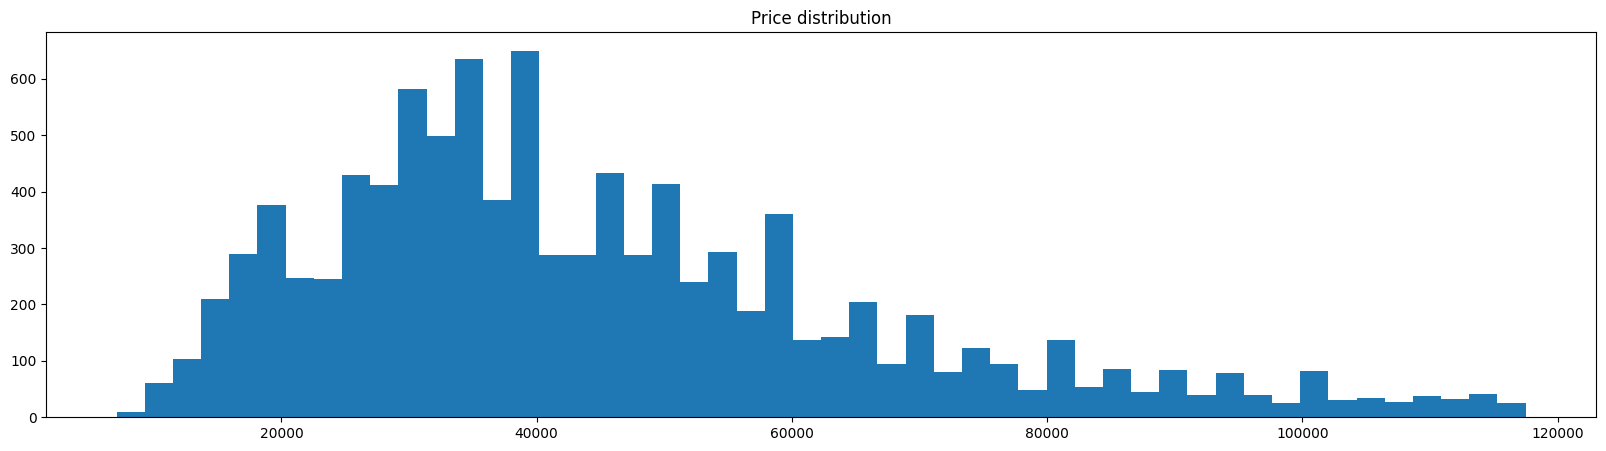

In [18]:
plt.figure(figsize=(20, 5))
plt.hist(listings_Santiago_df.loc[listings_Santiago_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

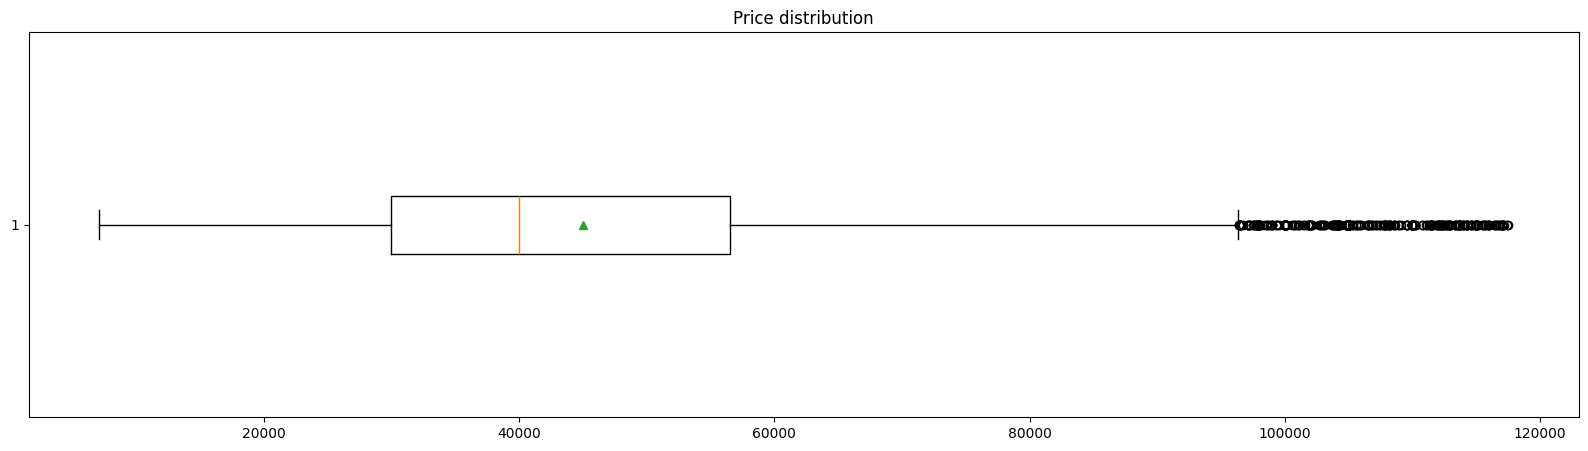

In [34]:
plt.figure(figsize=(20, 5))
plt.boxplot(listings_Santiago_df.loc[listings_Santiago_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], showmeans=True, vert=False)
plt.title("Price distribution")
plt.show()

#### 2.2 Location

In [20]:
# Showing unique values of neighborhoods
listings_Santiago_df["neighbourhood_cleansed"].unique()

array(['Providencia', 'Lo Barnechea', 'Recoleta', 'Santiago',
       'La Florida', 'Las Condes', 'La Reina', 'Ñuñoa', 'Independencia',
       'San Miguel', 'Vitacura', 'Maipú', 'Peñalolén', 'Estación Central',
       'Pedro Aguirre Cerda', 'San Joaquín', 'Macul', 'El Bosque',
       'Lo Espejo', 'La Cisterna', 'Quinta Normal', 'Quilicura',
       'Pudahuel', 'Lo Prado', 'Huechuraba', 'Renca', 'Cerrillos',
       'La Granja', 'Conchalí', 'Cerro Navia', 'San Ramón'], dtype=object)

In [21]:
listings_Santiago_df["neighbourhood_cleansed"].value_counts(dropna=False, normalize=True)

neighbourhood_cleansed
Santiago               0.343446
Providencia            0.190684
Las Condes             0.168850
Ñuñoa                  0.076228
Lo Barnechea           0.056615
Vitacura               0.024669
Recoleta               0.020302
Estación Central       0.018463
La Florida             0.012334
San Miguel             0.011798
Macul                  0.010879
La Reina               0.009959
Maipú                  0.007814
Peñalolén              0.006818
Independencia          0.006589
San Joaquín            0.006435
Pudahuel               0.005516
La Cisterna            0.005516
Huechuraba             0.004214
Quinta Normal          0.003294
Quilicura              0.002911
Renca                  0.001685
El Bosque              0.000996
Cerrillos              0.000919
Lo Prado               0.000766
Conchalí               0.000689
La Granja              0.000689
Pedro Aguirre Cerda    0.000383
Cerro Navia            0.000383
Lo Espejo              0.000077
San Ramón        

In [22]:
listings_Santiago_df["neighbourhood_cleansed"].value_counts(dropna=False, normalize=False)

neighbourhood_cleansed
Santiago               4483
Providencia            2489
Las Condes             2204
Ñuñoa                   995
Lo Barnechea            739
Vitacura                322
Recoleta                265
Estación Central        241
La Florida              161
San Miguel              154
Macul                   142
La Reina                130
Maipú                   102
Peñalolén                89
Independencia            86
San Joaquín              84
Pudahuel                 72
La Cisterna              72
Huechuraba               55
Quinta Normal            43
Quilicura                38
Renca                    22
El Bosque                13
Cerrillos                12
Lo Prado                 10
Conchalí                  9
La Granja                 9
Pedro Aguirre Cerda       5
Cerro Navia               5
Lo Espejo                 1
San Ramón                 1
Name: count, dtype: int64

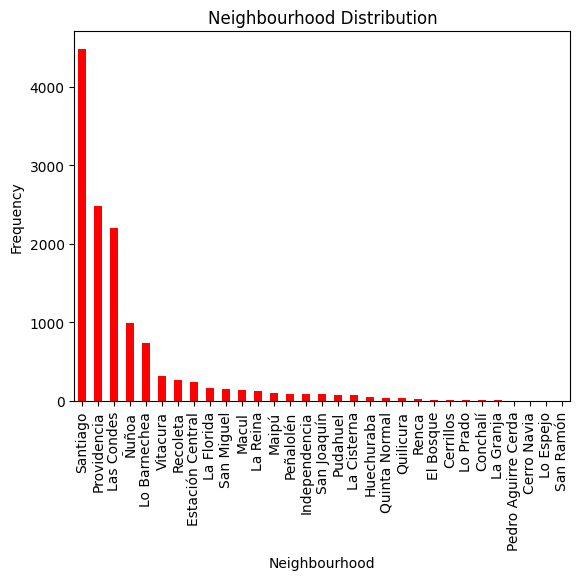

In [23]:
listings_Santiago_df["neighbourhood_cleansed"].value_counts().plot(kind="bar", color="red")
plt.title("Neighbourhood Distribution")
plt.xlabel("Neighbourhood")
plt.ylabel("Frequency")
plt.show()

#### 2.3 Property Type

In [24]:
# Calculating the relative frecuency of room types
listings_Santiago_df["room_type"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

room_type
Entire home/apt    0.705585
Private room       0.279093
Shared room        0.012794
Hotel room         0.002528
Name: proportion, dtype: float64

In [25]:
listings_Santiago_df["room_type"].value_counts(dropna=False, normalize=False)

room_type
Entire home/apt    9210
Private room       3643
Shared room         167
Hotel room           33
Name: count, dtype: int64

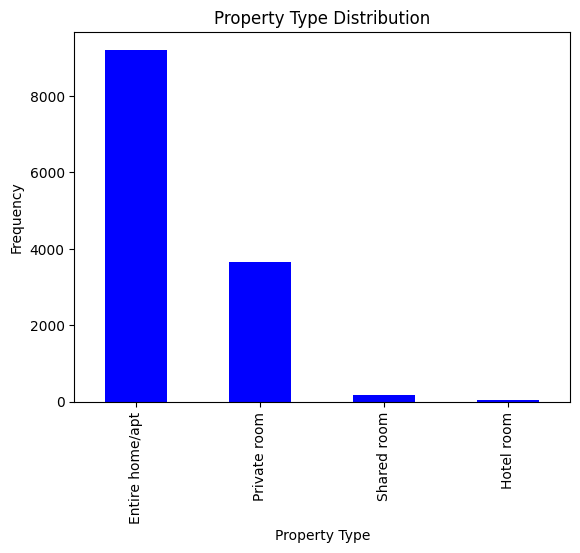

In [26]:
listings_Santiago_df["room_type"].value_counts().plot(kind="bar", color="blue")
plt.title("Property Type Distribution")
plt.xlabel("Property Type")
plt.ylabel("Frequency")
plt.show()

#### 2.4 User Rating

In [28]:
mean_rating = listings_Santiago_df['review_scores_value'].mean(skipna=True)
print(mean_rating)

4.712848056537102


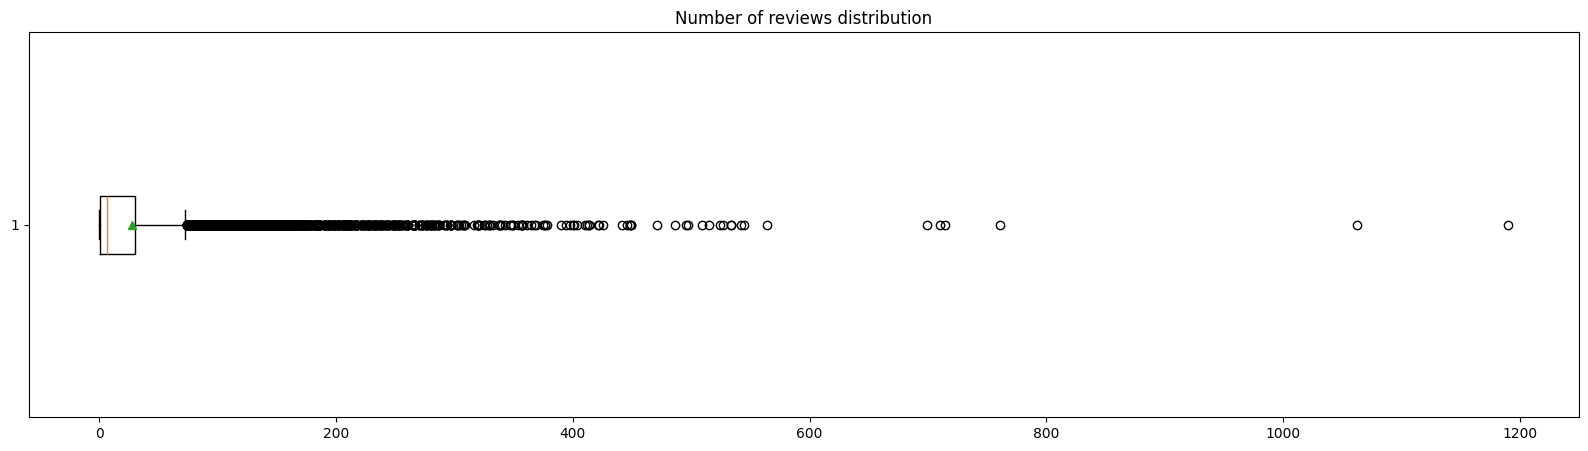

In [29]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_Santiago_df["number_of_reviews"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

#### 2.5 Amenities

In [32]:
listings_Santiago_df["amenities"].unique()

array(['[]',
       '["Pool", "BBQ grill", "Air conditioning", "Wifi", "Shampoo", "Fire extinguisher", "Carbon monoxide alarm", "Microwave", "Paid parking on premises", "Dishes and silverware", "Hair dryer", "TV with standard cable", "Washer", "Host greets you", "Oven", "Heating", "Hangers", "Long term stays allowed", "Elevator", "Paid parking off premises", "First aid kit", "Cooking basics", "Smoke alarm", "Refrigerator", "Essentials", "Gym", "Dryer", "Iron", "Hot water", "Kitchen"]',
       '["Free parking on premises", "Essentials", "Self check-in", "Building staff", "Heating", "TV with standard cable", "Hot water", "Kitchen"]',
       ...,
       '["Pets allowed", "TV", "Paid parking on premises", "Wifi", "Host greets you", "Kitchen", "Exterior security cameras on property"]',
       '["Dining table", "Freezer", "Clothing storage", "Laundromat nearby", "Free parking on premises", "Room-darkening shades", "Bed linens", "Outdoor furniture", "Wifi", "Shampoo", "Body soap", "Fire extin

#### Other 

In [30]:
# Calculating basic statistics of accommodates
listings_Santiago_df["accommodates"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    13053.000000
mean         2.930284
std          1.843821
min          1.000000
5%           1.000000
25%          2.000000
50%          2.000000
75%          4.000000
95%          6.000000
max         16.000000
Name: accommodates, dtype: float64

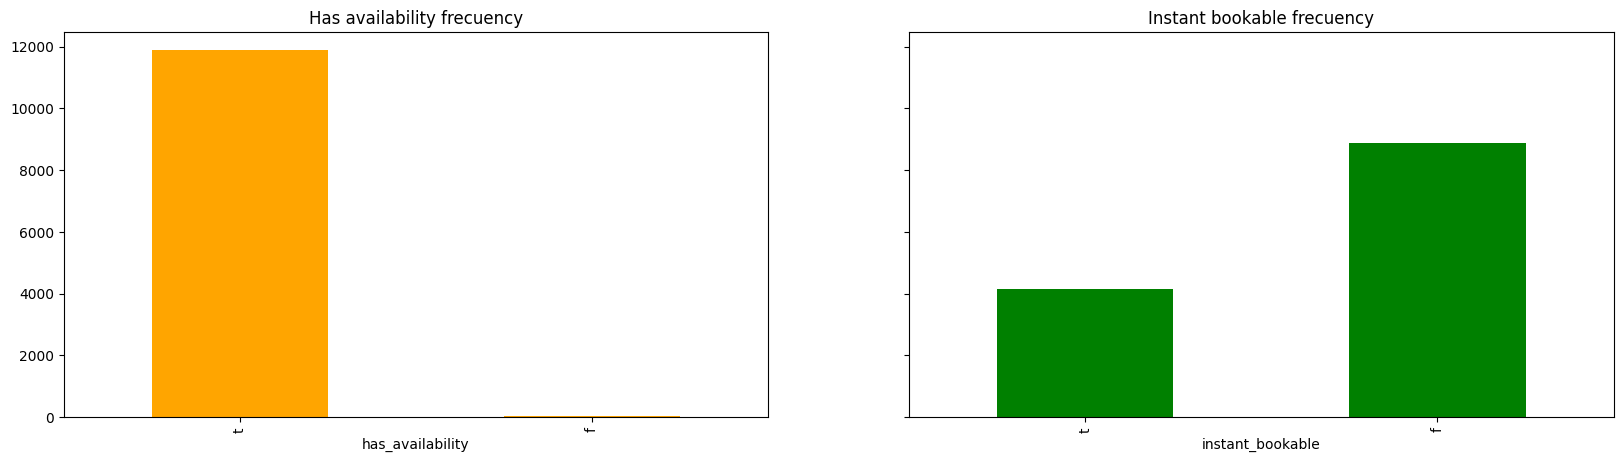

In [31]:
# Plotting bar charts for has availability and instant bookable
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
listings_Santiago_df["has_availability"].value_counts().plot(kind="bar", ax=ax1, color="orange")
listings_Santiago_df["instant_bookable"].value_counts().sort_index(ascending=False).plot(kind="bar", ax=ax2, color="green")
ax1.set_title("Has availability frecuency")
ax2.set_title("Instant bookable frecuency")
plt.show()

### 2. Bivariate analysis

In [ ]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores")
plt.show()

In [ ]:
# For large datasets, some visualizations are innefective when trying to represent individual instances
# A naive strategy is to use only a random sample to visualize
listings_sample_df =  listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
listings_sample_df.shape

In [ ]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=listings_sample_df["price_float"],
    y=listings_sample_df["review_scores_value"]
)
plt.title("Relationship between price and review score value")
plt.grid()
plt.show()

In [ ]:
# Another common strategy for working with datasets with high variability is by filtering the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()

In [ ]:
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

In [ ]:
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

In [ ]:
# Plotting price distribution by neighborhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

In [ ]:
# Plotting number of reviews distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)],
    x="number_of_reviews",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "number_of_reviews"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.xlim([0, 200])
plt.show()